<a href="https://colab.research.google.com/github/paws07/bbc_news_text_classification/blob/master/Copy_of_DS_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#U-Haul Data Challenge

## About
This data challenge is based on a pseudo realistic use case. U-Haul is piloting a new shipping program and we want to explore the effectiveness and if we can better predict success of associated offers.

In this program people who rent a truck on a one-way trip can agree to take and deliver some additional boxes in exchange for a discount. In this process the renter of the truck will be presented with an offer to go pick-up one or more boxes from another location, then drop them off at a new location before dropping off their rental at their new destination. The idea is that renters frequently have extra space, and drivers might be happy to added a few extra miles on either end of their trip in exchange for a discount on the rental.

Currently the system works by finding boxes that need shipping within a radius of the truck pick-up and drop-off point. Ideally the shorter the distance the driver has to drive from their pick-up and drop-off relative to the package pick-up and drop-off, the better. Based on the matches, an agent then reaches out to the truck renter and makes an offer to drive the boxes. This offer process is intensive in terms of agent time, and thus it would be great if we could automatically determine if a truck renter is likely to accept an offer.

The dataset contains all the offers that were made through this program.  Features include parameters around the offer. The target is if the offer an agent made was successful (the truck renter accepted the offer).

## Goal

**The goal is to predict what truck returns are likely to accept an offer to move boxes in exchange for a discount**. Please build out a model that does this as you see fit.  

Document throughout as you think is best, but at the end please include two summaries:  
1. A brief summary directed at the data team who already understand data science and machine learning.  
2. A summary directed at the program manager of this product. Assume that they know the goal and data, but that they are not necessarily aware of the nuance of data science projects.

## The data

There are a number of features in this dataset.  They are:
* **pickup_date_difference**: This is the number of days between when the truck is due to be picked up and when the boxes need to be picked up.  So, let’s say a truck will be picked up on May 15th, and the boxes need to be picked up on on May 18th, then the difference is +3.
* **dropoff_date_difference**: This is the number of days between when the truck is due to be dropped off and when the boxes need to be dropped off.  So, let’s say a truck will be dropped off on  June 1s, and the boxes on June 3rd, then the difference is +2.
* **Origin_to_pickup**: This is the number of extra miles between the truck's pick-up point and where the boxes must be picked up.
* **Destination_to_dropoff**: This is the number of extra miles between the trucks destination and where the boxes must be delivered
* **Origin_to_destination**: This is the distance between the truck renter’s starting point of where they got the truck to the destination where they’ll return the truck
* **pickup_to_dropoff**: This is the number of miles between the box pick-up point and the box drop-off point
* **Out_of_way_score**:  This is a metric for how much extra distance the truck renter needs to drive in order to pick up and drop off the boxes.
* **Truck_size**:  Renters can rent either a small or large truck
* **Rental_rate**:  The cost in dollars of the truck rental
* **Discount_offer**: The discount in dollars for transporting the boxes
* **Insurance_purchased**: If they bought insurance with their rental
* **Renter_verified**: Are they pre-verified
* **Date_of_birth**: Reported date of birth
* **Success**: If an renter accepted the offer

## out_of_way_score

Below is an illustration of the distances involved.  The out of way score is essentially the percent extra distance needed to perform the pick-up and drop-off relative to the original distance from origin to destination.  In this example below the score would be high as they have to drive away from their destination to pick-up, and past it to drop-off
![](https://i.imgur.com/ZcTomDt.png)


## Tools

This is obviously a google Colab notebook. Please stick to this environment for the challenge.  Virtually all the common data science packages are pre installed.  You can pip install others if needed.  If you do that, leave the code block there so we can install it as well.

You can add code and text cells by hovering at the top or bottom of existing cells.  Text cells support markdown formatting or auto formatting.  See screenshot below.

![](https://i.imgur.com/0d5L9Wr.png)

 ## Getting started

 I've included one cell with a pandas import and alias.  The next just has the data import. Please alter/add those as you see fit. Of course, add as many code and text blocks as needed.




# Problem statement:
##### Based on the provided information, build a good model to predict what truck returns are likely to accept the offer to move extra boxes in exchange to rental discount.


In [ ]:
# Necessary import
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1. Load dataset


In [ ]:
# Link to CSV to be imported as pandas data frame
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1xYadr0BJPR2YYLZyK0eEX0cSIEiMmBV-00KrSwaLZK4/gviz/tq?tqx=out:csv")

In [ ]:
# The rest is up you you :)
df.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,date_of_birth,success
0,7,0,1533.72000,111.071000,685.25934,969.54160,15.14,Small,1,538.4,35,yes,True,2/17/1960,no
1,2,6,2915.52900,192.151580,1933.36300,917.51300,4.37,Large,1,3226.5,45,yes,True,3/23/1958,no
2,6,6,1818.12960,39.670200,1645.80850,185.09406,2.88,Small,1,1123.3,45,yes,True,2/8/1959,no
3,4,1,965.23987,20.485987,985.97200,64.66548,10.97,Large,1,1567.7,35,yes,True,3/26/1970,no
4,6,0,1152.21420,66.468080,743.04930,538.75366,17.02,Small,1,1523.5,35,yes,True,4/4/1965,no


# 2. Data preprocessing

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(1000, 15)

We have 1000 observations, 14 predictor variables(features) and 1 target variable. And there is no duplicated entries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dropoff_date_difference  1000 non-null   int64  
 1   pickup_date_difference   1000 non-null   int64  
 2   origin_to_destination    1000 non-null   float64
 3   origin_to_pickup         1000 non-null   float64
 4   pickup_to_dropoff        1000 non-null   float64
 5   destination_to_dropoff   1000 non-null   float64
 6   out_of_way_score         1000 non-null   float64
 7   truck_size               1000 non-null   object 
 8   load_size                1000 non-null   int64  
 9   rental_rate              1000 non-null   float64
 10  offer_amount             1000 non-null   int64  
 11  insurance_purchased      1000 non-null   object 
 12  renter_verified          1000 non-null   bool   
 13  date_of_birth            1000 non-null   object 
 14  success                  

**2.1 Inspect the 'date_of_birth' feature**

In [ ]:
df.date_of_birth.describe()


count          1000
unique          782
top       12/9/1993
freq              8
Name: date_of_birth, dtype: object

As we would expect, date_of_birth is typically unique, so it would be more useful if convert them to age.

In [ ]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['year'] = df['date_of_birth'].dt.year
current_year = datetime.today().year
df['age'] = current_year - df['year']
df = df.drop(['date_of_birth', 'year'], axis=1)
df.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age
0,7,0,1533.72000,111.071000,685.25934,969.54160,15.14,Small,1,538.4,35,yes,True,no,61
1,2,6,2915.52900,192.151580,1933.36300,917.51300,4.37,Large,1,3226.5,45,yes,True,no,63
2,6,6,1818.12960,39.670200,1645.80850,185.09406,2.88,Small,1,1123.3,45,yes,True,no,62
3,4,1,965.23987,20.485987,985.97200,64.66548,10.97,Large,1,1567.7,35,yes,True,no,51
4,6,0,1152.21420,66.468080,743.04930,538.75366,17.02,Small,1,1523.5,35,yes,True,no,56


**2.2 Inspect the numeric variables: 'origin_to_destination', 'origin_to_pickup', 'pickup_to_dropoff', 'destination_to_dropoff' , 'rental_rate'**

In [ ]:
# Convert 'origin_to_destination', 'origin_to_pickup', 'pickup_to_dropoff', 'destination_to_dropoff' , 'rental_rate' to integer
cols2 = ['origin_to_destination', 'origin_to_pickup', 'pickup_to_dropoff', 'destination_to_dropoff' , 'rental_rate']
for col in cols2:
  df[col] = df[col].map(int)
df.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age
0,7,0,1533,111,685,969,15.14,Small,1,538,35,yes,True,no,61
1,2,6,2915,192,1933,917,4.37,Large,1,3226,45,yes,True,no,63
2,6,6,1818,39,1645,185,2.88,Small,1,1123,45,yes,True,no,62
3,4,1,965,20,985,64,10.97,Large,1,1567,35,yes,True,no,51
4,6,0,1152,66,743,538,17.02,Small,1,1523,35,yes,True,no,56


In [ ]:
# Now we can assess these 4 numeric variables, 'origin_to_destination', 'origin_to_pickup', 'pickup_to_dropoff','destination_to_dropoff'.
# We can construct a new variable to show how much extra miles/distances the truck renter has to drive
df['dist_diff'] = df.origin_to_pickup + df.pickup_to_dropoff + df.destination_to_dropoff - df.origin_to_destination
df.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff
0,7,0,1533,111,685,969,15.14,Small,1,538,35,yes,True,no,61,232
1,2,6,2915,192,1933,917,4.37,Large,1,3226,45,yes,True,no,63,127
2,6,6,1818,39,1645,185,2.88,Small,1,1123,45,yes,True,no,62,51
3,4,1,965,20,985,64,10.97,Large,1,1567,35,yes,True,no,51,104
4,6,0,1152,66,743,538,17.02,Small,1,1523,35,yes,True,no,56,195


In [ ]:
# There are 37 entries with negtive values.
# But the smallest entry we could get is 0, that's when the boxes' pickup and dropoff locations are both on the driver's way. So those negative entires may not be valid.
# At this point, I think it would be resonable to drop those entries, unless there'are other evidence suggests they are possible.
df[df.dist_diff < 0].head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff
23,7,1,799,8,780,7,-0.34,Small,1,1148,35,yes,True,no,69,-4
65,7,1,2344,74,1116,1126,-1.11,Large,1,629,40,yes,False,no,73,-28
99,7,1,3043,362,2627,0,-1.75,Large,1,2073,50,yes,True,no,40,-54
100,7,1,3043,362,2627,0,-1.75,Large,1,2030,50,yes,True,no,40,-54
130,5,0,561,331,151,38,-6.96,Small,1,608,25,NONE,True,no,54,-41


In [ ]:
df[df.dist_diff < 0].shape[0]

37

In [ ]:
df = df[df.dist_diff >=0]
df.shape

(963, 16)

**2.3 Inspect the numeric variable: 'drop_off_date_difference' and 'pick_up_date_difference'**

In [ ]:
df.dropoff_date_difference.describe()

count    963.000000
mean       5.365524
std        4.611219
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       40.000000
Name: dropoff_date_difference, dtype: float64

In [ ]:
df.pickup_date_difference.describe()

count    963.000000
mean       2.466251
std        1.804261
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: pickup_date_difference, dtype: float64

In [ ]:
# Combine them into a single feature 'drop_pick_date_diff'
df['drop_pick_date_diff'] = df.dropoff_date_difference + df.pickup_date_difference

**2.4 Inspect categorical and boolean variables: 'truck_size', 'load_size', 'renter_verified', 'insurance_purchased' and 'success'**

In [ ]:
df.truck_size.value_counts()

Small           535
Large           406
not_reported     22
Name: truck_size, dtype: int64

In [ ]:
df.load_size.value_counts()
# 'load_size' was not described in the feature description.

1    788
2    175
Name: load_size, dtype: int64

In [ ]:
df.renter_verified.value_counts()

True     608
False    355
Name: renter_verified, dtype: int64

In [ ]:
df.insurance_purchased.value_counts()

yes     794
NONE    169
Name: insurance_purchased, dtype: int64

In [ ]:
df.success.value_counts()

no     860
yes    103
Name: success, dtype: int64

**As we can see, the target variable is hightly unbalanced, which must be addressed**

In [ ]:
# Label encode variables
cols = ['truck_size', 'renter_verified', 'insurance_purchased', 'success']

for col in cols:
  df[col] = df[col].astype('category').cat.codes

In [ ]:
df.truck_size.value_counts()

1    535
0    406
2     22
Name: truck_size, dtype: int64

In [ ]:
# impute NaN with mode = 'Small'
df['truck_size'] = np.where(df.truck_size == 2, 1, df.truck_size)
df.truck_size.value_counts()

1    557
0    406
Name: truck_size, dtype: int64

Label encoded 'truck_size': 'Small': 1, 'Large': 0


In [ ]:
df.renter_verified.value_counts()

1    608
0    355
Name: renter_verified, dtype: int64

Label encoded 'renter_verified': True: 1, False: 0

In [ ]:
df.insurance_purchased.value_counts()

1    794
0    169
Name: insurance_purchased, dtype: int64

Label encoded 'insurance_purchased': 'yes': 1, 'NONE': 0

In [ ]:
df.success.value_counts()

0    860
1    103
Name: success, dtype: int64

In [ ]:
1 - np.sum(df.success)/len(df.success)

0.893042575285566

Label encoded 'success': 'yes': 1, 'no: 0.
As shown above, the target variable 'success' is highly imbalanced.


In [ ]:
df.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff
0,7,0,1533,111,685,969,15.14,1,1,538,35,1,1,0,61,232,7
1,2,6,2915,192,1933,917,4.37,0,1,3226,45,1,1,0,63,127,8
2,6,6,1818,39,1645,185,2.88,1,1,1123,45,1,1,0,62,51,12
3,4,1,965,20,985,64,10.97,0,1,1567,35,1,1,0,51,104,5
4,6,0,1152,66,743,538,17.02,1,1,1523,35,1,1,0,56,195,6


In [ ]:
# Select the engineered features to a new dataframe
#df1 = df.loc[:, ['out_of_way_score', 'truck_size', 'load_size', 'rental_rate', 'offer_amount', 'insurance_purchased', 'renter_verified', 'age', 'dist_diff', 'drop_pick_date_diff', 'success']]

In [ ]:
df1 = df.copy()
df1.shape

(963, 17)

# 3. Exploratory Data Analysis

**3.1 Analyze features, binning and label encoding**
- As we have converted all the category features to numeric, let's further exam those features and perform encoding if necessary.

In [ ]:
# Features:
df1.columns.values.tolist()

['dropoff_date_difference',
 'pickup_date_difference',
 'origin_to_destination',
 'origin_to_pickup',
 'pickup_to_dropoff',
 'destination_to_dropoff',
 'out_of_way_score',
 'truck_size',
 'load_size',
 'rental_rate',
 'offer_amount',
 'insurance_purchased',
 'renter_verified',
 'success',
 'age',
 'dist_diff',
 'drop_pick_date_diff']

In [ ]:
# Analyze 'age'
df1.age.describe()

count    963.000000
mean      48.753894
std       14.556317
min       19.000000
25%       36.000000
50%       51.000000
75%       60.000000
max       83.000000
Name: age, dtype: float64

In [ ]:
# convert 'age' to 'agerange'
bins_age = [0, 30, 40, 50, 60, np.inf]
names_age = ['< 30', '30-40', '40-50', '50-60', '60+']
df1['agerange'] = pd.cut(df1['age'], bins_age, labels=names_age)
#bins2 = [0, 36, 51, 75, np.inf]
#names2 = ['<36', '36-51', '51-75', '75+']
#df['agerange2'] = pd.cut(df['age'], bins2, labels=names2)

In [ ]:
df1.drop_pick_date_diff.describe()

count    963.000000
mean       7.831776
std        4.297989
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       42.000000
Name: drop_pick_date_diff, dtype: float64

In [ ]:
# convert 'drop_pick_date_difference' to 'drop_pick_date_range'
bins_date = [0, 5, 10, np.inf]
names_date = ['< 5', '5-10', '10+']
df1['drop_pick_date_range'] = pd.cut(df1['drop_pick_date_diff'], bins_date, labels=names_date)
df1.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff,agerange,drop_pick_date_range
0,7,0,1533,111,685,969,15.14,1,1,538,35,1,1,0,61,232,7,60+,5-10
1,2,6,2915,192,1933,917,4.37,0,1,3226,45,1,1,0,63,127,8,60+,5-10
2,6,6,1818,39,1645,185,2.88,1,1,1123,45,1,1,0,62,51,12,60+,10+
3,4,1,965,20,985,64,10.97,0,1,1567,35,1,1,0,51,104,5,50-60,< 5
4,6,0,1152,66,743,538,17.02,1,1,1523,35,1,1,0,56,195,6,50-60,5-10


In [ ]:
df1.offer_amount.describe()

count    963.000000
mean      41.942887
std       13.163448
min       25.000000
25%       35.000000
50%       40.000000
75%       45.000000
max       88.000000
Name: offer_amount, dtype: float64

In [ ]:
bins_offer = [0, 25, 35, 40, 50, np.inf]
names_offer = ['< 25', '25-35', '35-40', '40-50', '50+']
df1['offer_range'] = pd.cut(df1['offer_amount'], bins_offer, labels=names_offer)
df1.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff,agerange,drop_pick_date_range,offer_range
0,7,0,1533,111,685,969,15.14,1,1,538,35,1,1,0,61,232,7,60+,5-10,25-35
1,2,6,2915,192,1933,917,4.37,0,1,3226,45,1,1,0,63,127,8,60+,5-10,40-50
2,6,6,1818,39,1645,185,2.88,1,1,1123,45,1,1,0,62,51,12,60+,10+,40-50
3,4,1,965,20,985,64,10.97,0,1,1567,35,1,1,0,51,104,5,50-60,< 5,25-35
4,6,0,1152,66,743,538,17.02,1,1,1523,35,1,1,0,56,195,6,50-60,5-10,25-35


In [ ]:
df1.rental_rate.describe()

count     963.000000
mean     1673.336449
std      1166.286949
min        29.000000
25%       793.500000
50%      1401.000000
75%      2293.000000
max      6986.000000
Name: rental_rate, dtype: float64

In [ ]:
bins_rental_rate = [0, 500, 800, 1400, 2000, 5000, np.inf]
names_rental_rate = ['< 500', '500-800', '800-1400', '1400-2000', '2000-5000', '5000+']
df1['rental_rate_range'] = pd.cut(df1['rental_rate'], bins_rental_rate, labels=names_rental_rate)
df1.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff,agerange,drop_pick_date_range,offer_range,rental_rate_range
0,7,0,1533,111,685,969,15.14,1,1,538,35,1,1,0,61,232,7,60+,5-10,25-35,500-800
1,2,6,2915,192,1933,917,4.37,0,1,3226,45,1,1,0,63,127,8,60+,5-10,40-50,2000-5000
2,6,6,1818,39,1645,185,2.88,1,1,1123,45,1,1,0,62,51,12,60+,10+,40-50,800-1400
3,4,1,965,20,985,64,10.97,0,1,1567,35,1,1,0,51,104,5,50-60,< 5,25-35,1400-2000
4,6,0,1152,66,743,538,17.02,1,1,1523,35,1,1,0,56,195,6,50-60,5-10,25-35,1400-2000


The following plot shows features 'age', 'drop_pick_date_difference', 'offer_range' before and after binning.

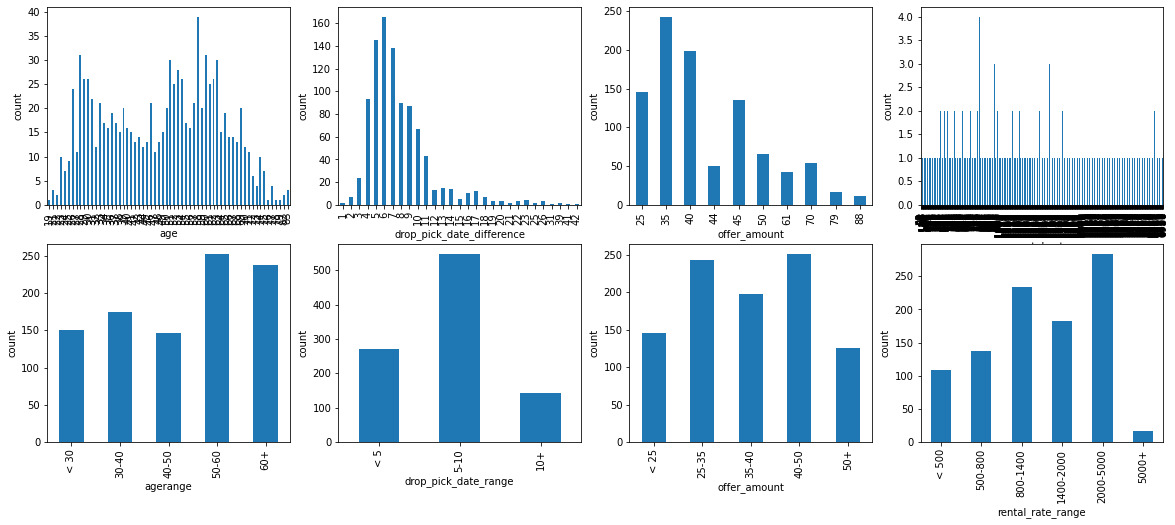

In [ ]:
fig, axarr = plt.subplots(2, 4, figsize = (20, 8))
df1.drop_pick_date_diff.value_counts().sort_index().plot(kind = 'bar', ax=axarr[0][1], xlabel = 'drop_pick_date_difference', ylabel = 'count')
df1.drop_pick_date_range.value_counts().sort_index().plot(kind = 'bar', ax=axarr[1][1], xlabel = 'drop_pick_date_range', ylabel = 'count')
df1.age.value_counts().sort_index().plot(kind = 'bar', ax = axarr[0][0], xlabel = 'age', ylabel = 'count')
df1.agerange.value_counts().sort_index().plot(kind = 'bar', ax = axarr[1][0], xlabel = 'agerange', ylabel = 'count')
df1.offer_amount.value_counts().sort_index().plot(kind = 'bar', ax = axarr[0][2], xlabel = 'offer_amount', ylabel = 'count')
df1.offer_range.value_counts().sort_index().plot(kind = 'bar', ax = axarr[1][2], xlabel = 'offer_amount', ylabel = 'count')
df1.rental_rate.value_counts().sort_index().plot(kind = 'bar', ax = axarr[0][3], xlabel = 'rental_rate', ylabel = 'count')
df1.rental_rate_range.value_counts().sort_index().plot(kind = 'bar', ax = axarr[1][3], xlabel = 'rental_rate_range', ylabel = 'count')



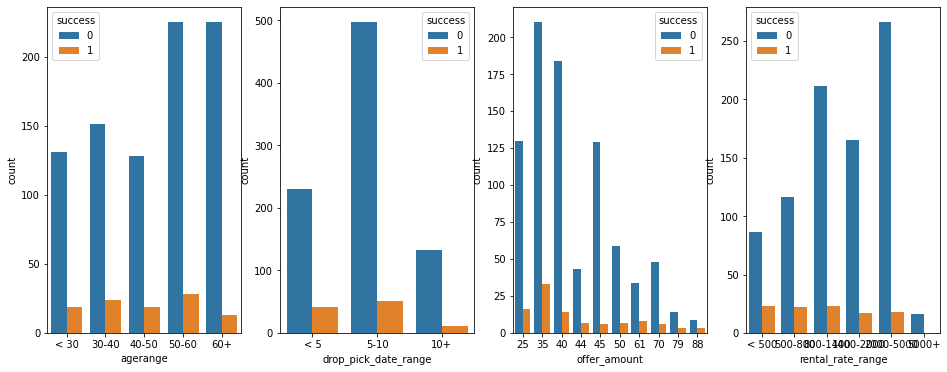

In [ ]:
fig, ax =plt.subplots(1, 4, figsize=(16, 6), squeeze=False)
sns.countplot(x="agerange", hue="success", data=df1, ax=ax[0][0])
sns.countplot(x="drop_pick_date_range", hue="success", data=df1, ax=ax[0][1])
sns.countplot(x="offer_amount", hue="success", data=df1, ax=ax[0][2])
sns.countplot(x="rental_rate_range", hue="success", data=df1, ax=ax[0][3])


**On the otherhand, we can still keep the above features as they were without doing binning**

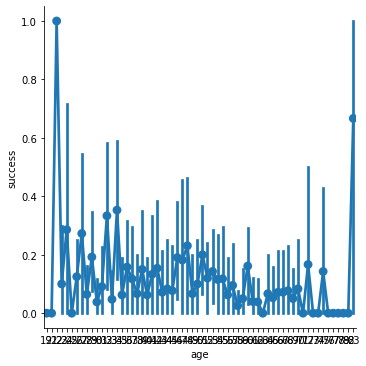

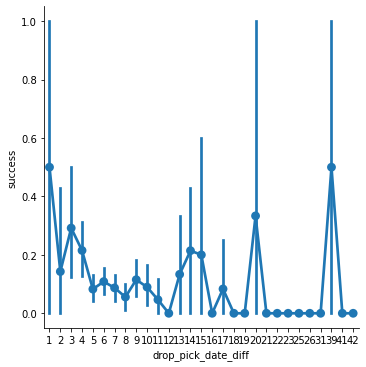

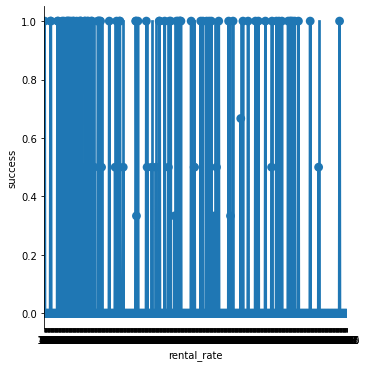

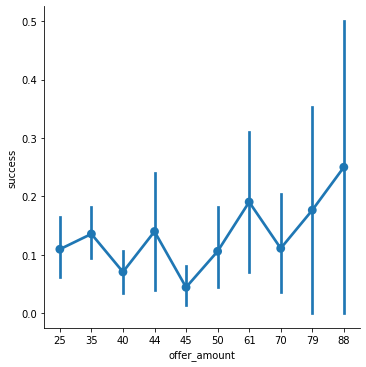

In [ ]:
cols = ['age', 'drop_pick_date_diff', 'rental_rate', 'offer_amount']
for col in cols:
  sns.factorplot(col, 'success', data = df1, aspect = 1)

**Label encoding of 'agerange'**

In [ ]:
cat1 = ['< 30', '30-40', '40-50', '50-60', '60+']
#cat2 = ['< 5', '5-10', '10+']

column_to_cat = {'agerange': cat1}

mapper_df = DataFrameMapper(
    [
     ([col], OrdinalEncoder(categories=[cat])) for col, cat in column_to_cat.items()
    ],
    df_out = True
)

df_enc = mapper_df.fit_transform(df1.copy())
df_enc[df_enc.columns.values.tolist()] = df_enc[df_enc.columns.values.tolist()].astype(int)


In [ ]:
df_enc = pd.concat([df1, df_enc], axis = 1)
df_enc.head()

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff,agerange,drop_pick_date_range,offer_range,rental_rate_range,agerange
0,7,0,1533,111,685,969,15.14,1,1,538,35,1,1,0,61,232,7,60+,5-10,25-35,500-800,4
1,2,6,2915,192,1933,917,4.37,0,1,3226,45,1,1,0,63,127,8,60+,5-10,40-50,2000-5000,4
2,6,6,1818,39,1645,185,2.88,1,1,1123,45,1,1,0,62,51,12,60+,10+,40-50,800-1400,4
3,4,1,965,20,985,64,10.97,0,1,1567,35,1,1,0,51,104,5,50-60,< 5,25-35,1400-2000,3
4,6,0,1152,66,743,538,17.02,1,1,1523,35,1,1,0,56,195,6,50-60,5-10,25-35,1400-2000,3


**3.2 Examine the correlation among features and target**

In [ ]:
corr = df_enc.corr(method = 'spearman')
corr

,dropoff_date_difference,pickup_date_difference,origin_to_destination,origin_to_pickup,pickup_to_dropoff,destination_to_dropoff,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,dist_diff,drop_pick_date_diff,agerange
dropoff_date_difference,1.000000,-0.510036,-0.105278,-0.063973,0.002782,-0.154441,-0.019980,0.019669,0.031620,-0.082596,0.026136,-0.062219,0.033087,-0.017738,0.017379,-0.075049,0.792380,0.017560
pickup_date_difference,-0.510036,1.000000,0.083357,-0.025352,0.131768,-0.026090,0.075129,0.013327,-0.004777,0.073472,0.095501,0.048392,0.013842,-0.095166,-0.036740,0.114995,0.062963,-0.038470
origin_to_destination,-0.105278,0.083357,1.000000,0.320307,0.794031,0.318689,0.031556,-0.021729,-0.016410,0.487655,0.611675,0.036422,-0.047123,-0.102124,0.009966,0.515405,-0.046763,0.004199
origin_to_pickup,-0.063973,-0.025352,0.320307,1.000000,0.014121,-0.091907,0.108808,-0.041555,0.020183,0.106308,0.021686,-0.008853,-0.050181,-0.194743,0.041906,0.265023,-0.105225,0.039089
pickup_to_dropoff,0.002782,0.131768,0.794031,0.014121,1.000000,-0.072650,0.070222,-0.011479,-0.065048,0.442624,0.730056,0.026897,-0.021080,-0.047282,-0.031198,0.451826,0.116935,-0.034881
destination_to_dropoff,-0.154441,-0.026090,0.318689,-0.091907,-0.072650,1.000000,0.166084,-0.024301,0.088398,0.183435,0.004863,-0.007964,-0.055087,-0.093979,0.040885,0.304094,-0.184932,0.046792
out_of_way_score,-0.019980,0.075129,0.031556,0.108808,0.070222,0.166084,1.000000,0.004342,-0.015562,0.064902,0.042918,-0.087884,-0.029787,-0.200181,-0.066002,0.834360,0.035078,-0.058760
truck_size,0.019669,0.013327,-0.021729,-0.041555,-0.011479,-0.024301,0.004342,1.000000,0.053332,-0.039195,0.020763,0.004145,-0.002910,0.057322,-0.013975,-0.004962,0.030348,-0.022319
load_size,0.031620,-0.004777,-0.016410,0.020183,-0.065048,0.088398,-0.015562,0.053332,1.000000,0.021669,0.579827,0.033353,0.041931,0.072166,0.002306,-0.006592,0.026228,-0.005838
rental_rate,-0.082596,0.073472,0.487655,0.106308,0.442624,0.183435,0.064902,-0.039195,0.021669,1.000000,0.352867,0.046606,-0.039771,-0.148747,0.045592,0.308487,-0.034165,0.053043


**3.3 Examine the multicolinearity among features**

Text(0.5, 1.0, 'Multi-Collinearity of Features')

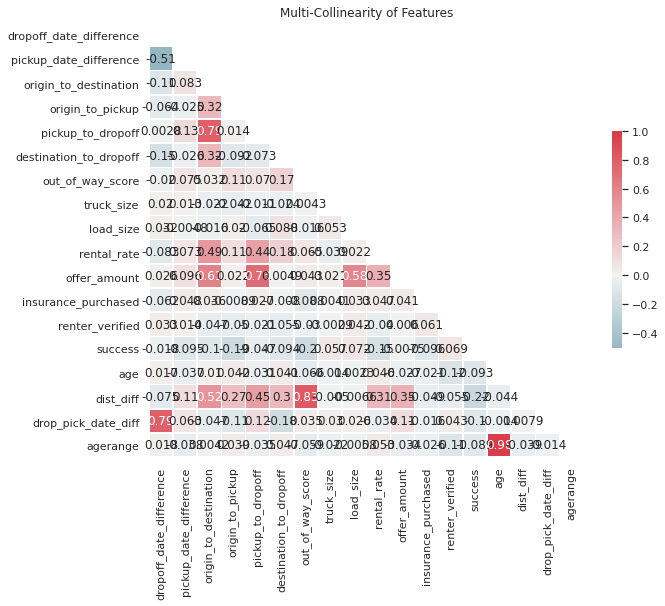

In [ ]:
sns.set(style = 'white')
# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# # set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
## annot= true, add the text into each cells
sns.heatmap(corr, annot = True, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidth = 0.5, cbar_kws = {"shrink": 0.5})

ax.set_title('Multi-Collinearity of Features')

**As we would expect, 'out_of_way_score' and 'dist_diff', 'age' and'agerange',  the other distance features are highly correlated, so we could drop them off**

In [ ]:
df2 = df_enc.drop(['dist_diff', 'agerange',
                   'dropoff_date_difference',
                   'pickup_date_difference',
                   'origin_to_destination',
                   'origin_to_pickup',
                   'destination_to_dropoff',
                   'pickup_to_dropoff', 'drop_pick_date_range', 'offer_range',
                   'rental_rate_range'], axis = 1)
df2.head()

,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,success,age,drop_pick_date_diff
0,15.14,1,1,538,35,1,1,0,61,7
1,4.37,0,1,3226,45,1,1,0,63,8
2,2.88,1,1,1123,45,1,1,0,62,12
3,10.97,0,1,1567,35,1,1,0,51,5
4,17.02,1,1,1523,35,1,1,0,56,6


In [ ]:
colnames = df2.columns.tolist()
colnames

['out_of_way_score',
 'truck_size',
 'load_size',
 'rental_rate',
 'offer_amount',
 'insurance_purchased',
 'renter_verified',
 'success',
 'age',
 'drop_pick_date_diff']

In [ ]:
df2 = df2[['out_of_way_score',
 'truck_size',
 'load_size',
 'rental_rate',
 'offer_amount',
 'insurance_purchased',
 'renter_verified',
 'age',
 'drop_pick_date_diff',
 'success']]
df2.head()

,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,age,drop_pick_date_diff,success
0,15.14,1,1,538,35,1,1,61,7,0
1,4.37,0,1,3226,45,1,1,63,8,0
2,2.88,1,1,1123,45,1,1,62,12,0
3,10.97,0,1,1567,35,1,1,51,5,0
4,17.02,1,1,1523,35,1,1,56,6,0


In [ ]:
corr2 = df2.corr(method = 'spearman')
corr2

,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,age,drop_pick_date_diff,success
out_of_way_score,1.000000,0.004342,-0.015562,0.064902,0.042918,-0.087884,-0.029787,-0.066002,0.035078,-0.200181
truck_size,0.004342,1.000000,0.053332,-0.039195,0.020763,0.004145,-0.002910,-0.013975,0.030348,0.057322
load_size,-0.015562,0.053332,1.000000,0.021669,0.579827,0.033353,0.041931,0.002306,0.026228,0.072166
rental_rate,0.064902,-0.039195,0.021669,1.000000,0.352867,0.046606,-0.039771,0.045592,-0.034165,-0.148747
offer_amount,0.042918,0.020763,0.579827,0.352867,1.000000,0.041211,0.006016,-0.027188,0.113271,-0.007474
insurance_purchased,-0.087884,0.004145,0.033353,0.046606,0.041211,1.000000,0.060546,-0.020578,-0.016172,-0.096493
renter_verified,-0.029787,-0.002910,0.041931,-0.039771,0.006016,0.060546,1.000000,-0.120517,0.043051,0.069436
age,-0.066002,-0.013975,0.002306,0.045592,-0.027188,-0.020578,-0.120517,1.000000,-0.013654,-0.093005
drop_pick_date_diff,0.035078,0.030348,0.026228,-0.034165,0.113271,-0.016172,0.043051,-0.013654,1.000000,-0.100511
success,-0.200181,0.057322,0.072166,-0.148747,-0.007474,-0.096493,0.069436,-0.093005,-0.100511,1.000000


Text(0.5, 1.0, 'Multi-Collinearity of Features')

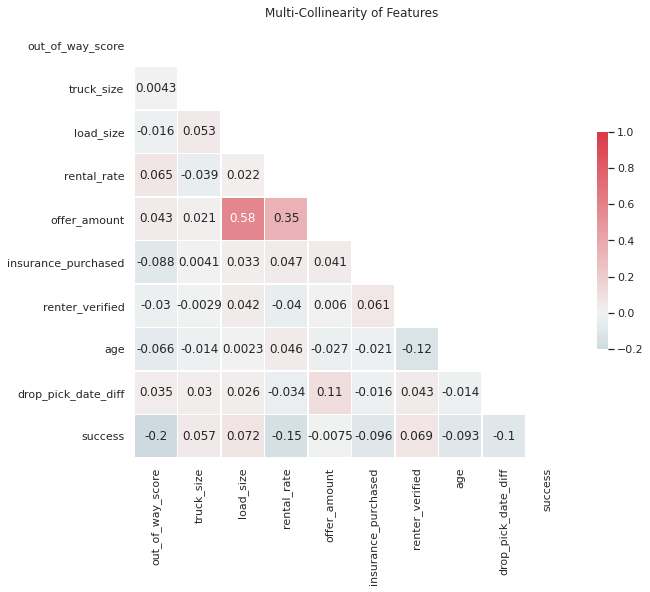

In [ ]:
sns.set(style = 'white')

mask = np.zeros_like(corr2, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10, 8))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr2, annot = True, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidth = 0.5, cbar_kws = {"shrink": 0.5})

ax.set_title('Multi-Collinearity of Features')

**3.2 Balance the target variable**




In [ ]:
X = df2.drop(['success'], axis = 1)
y = df2['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

**Normalize the numeric features.**

In [ ]:
train_numerical_features = list(X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = MinMaxScaler()
X_train_ss = pd.DataFrame(data = X_train)
X_train_ss[train_numerical_features] = ss_scaler.fit_transform(X_train_ss[train_numerical_features])
X_test_ss = pd.DataFrame(data = X_test)
X_test_ss[train_numerical_features] = ss_scaler.fit_transform(X_test_ss[train_numerical_features])

In [ ]:
X_train_ss.head()

,out_of_way_score,truck_size,load_size,rental_rate,offer_amount,insurance_purchased,renter_verified,age,drop_pick_date_diff
646,0.352912,0,0.0,0.123617,0.238095,1,1,0.734375,0.146341
894,0.088855,1,0.0,0.413540,0.238095,1,1,0.484375,0.243902
769,0.223896,0,0.0,0.205261,0.000000,0,1,0.312500,0.170732
293,0.265060,1,1.0,0.608308,0.714286,1,0,0.609375,0.146341
113,0.184739,1,1.0,0.090844,0.571429,0,1,0.531250,0.146341


**Two oversampling methods are tested: randomoversamping and SMOTE**

In [ ]:
over1 = RandomOverSampler(sampling_strategy = 'minority')
X_train1, y_train1 = over1.fit_resample(X_train_ss, y_train)

In [ ]:
X_train1

array([[0.35291165, 0.        , 0.        , ..., 1.        , 0.734375  ,
        0.14634146],
       [0.08885542, 1.        , 0.        , ..., 1.        , 0.484375  ,
        0.24390244],
       [0.22389558, 0.        , 0.        , ..., 1.        , 0.3125    ,
        0.17073171],
       ...,
       [0.00953815, 0.        , 1.        , ..., 1.        , 0.21875   ,
        0.34146341],
       [0.18574297, 1.        , 0.        , ..., 1.        , 0.203125  ,
        0.        ],
       [0.19277108, 1.        , 0.        , ..., 1.        , 0.703125  ,
        0.09756098]])

In [ ]:
Counter(y_train1)

Counter({0: 690, 1: 690})

In [ ]:
over2 = SMOTE(sampling_strategy=0.4)
X_train2, y_train2 = over2.fit_resample(X_train_ss, y_train)

In [ ]:
X_train2

array([[0.35291165, 0.        , 0.        , ..., 1.        , 0.734375  ,
        0.14634146],
       [0.08885542, 1.        , 0.        , ..., 1.        , 0.484375  ,
        0.24390244],
       [0.22389558, 0.        , 0.        , ..., 1.        , 0.3125    ,
        0.17073171],
       ...,
       [0.54732101, 1.        , 1.        , ..., 0.        , 0.52399143,
        0.18263861],
       [0.29307566, 1.        , 0.        , ..., 1.        , 0.58217468,
        0.19873046],
       [0.44179312, 1.        , 0.        , ..., 0.        , 0.34105227,
        0.10328124]])

In [ ]:
Counter(y_train2)

Counter({0: 690, 1: 276})

# 4. Build ML model

I developed five commonly used clasification models, including logistic regression, support vector machine(SVM), naive Bayes, random forest, and Xgboost to predict the binary outcome of success or not. The models will be used to fit the training data and predict the test data. The performance of these will be evaluated and compared based on multiple evaluation metrics, including roc_auc score, precision, recall and F1 score. The bese performaing model will be chosen to make the final prediction.

**4.1 No oversampling:**

In [ ]:
results_train = pd.DataFrame()
results_test = pd.DataFrame()

# Instantiate the machine learning classifiers
models = [LogisticRegression(), GaussianNB(), LinearSVC(dual=False), RandomForestClassifier(), xgb()]

for model in models:

    # train the model and make predictions
    clf = model.fit(X_train_ss, y_train)
    y_train_pred = clf.predict(X_train_ss)
    y_test_pred = clf.predict(X_test_ss)

    # evaluate model performance on the training data
    results_train = results_train.append ({'ROC_AUC': roc_auc_score(y_train, y_train_pred),
                                           'F1_Score': f1_score(y_train, y_train_pred),
                                           'Precision': precision_score(y_train, y_train_pred),
                                           'Recall': recall_score(y_train, y_train_pred)},
                                            ignore_index=True)

    # evaluate model performance on the test data
    results_test = results_test.append ({'ROC_AUC': roc_auc_score(y_test, y_test_pred),
                                         'F1_Score': f1_score(y_test, y_test_pred),
                                         'Precision': precision_score(y_test, y_test_pred),
                                         'Recall': recall_score(y_test, y_test_pred)},
                                          ignore_index=True)

results_train.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']
results_test.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']

results_train_t = results_train.T
results_train_t['Best Score'] = results_train_t.idxmax(axis=1)

results_test_t = results_test.T
results_test_t['Best Score'] = results_test_t.idxmax(axis=1)

In [ ]:
results_train_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.024691,0.212389,0.0,1.0,0.548673,RF
Precision,1.000000,0.363636,0.0,1.0,0.939394,LR
ROC_AUC,0.506250,0.559783,0.5,1.0,0.692301,RF
Recall,0.012500,0.150000,0.0,1.0,0.387500,RF


In [ ]:
results_test_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.0,0.060606,0.0,0.142857,0.137931,RF
Precision,0.0,0.100000,0.0,0.400000,0.333333,RF
ROC_AUC,0.5,0.495269,0.5,0.534655,0.531714,RF
Recall,0.0,0.043478,0.0,0.086957,0.086957,RF


**As we can see, without balancing the target variable, the performance of all models are very poor.**

**4.2 RandomOverSampling**

In [ ]:
results_train1 = pd.DataFrame()
results_test1 = pd.DataFrame()

# Instantiate the machine learning classifiers
models = [LogisticRegression(), GaussianNB(), LinearSVC(dual=False), RandomForestClassifier(), xgb()]

for model in models:

    # train the model and make predictions
    clf = model.fit(X_train1, y_train1)
    y_train_pred = clf.predict(X_train1)
    y_test_pred = clf.predict(X_test_ss.values)

    # evaluate model performance on the training data
    results_train1 = results_train1.append ({'ROC_AUC': roc_auc_score(y_train1, y_train_pred),
                                           'F1_Score': f1_score(y_train1, y_train_pred),
                                           'Precision': precision_score(y_train1, y_train_pred),
                                           'Recall': recall_score(y_train1, y_train_pred)},
                                            ignore_index=True)

    # evaluate model performance on the test data
    results_test1 = results_test1.append ({'ROC_AUC': roc_auc_score(y_test, y_test_pred),
                                         'F1_Score': f1_score(y_test, y_test_pred),
                                         'Precision': precision_score(y_test, y_test_pred),
                                         'Recall': recall_score(y_test, y_test_pred)},
                                          ignore_index=True)

results_train1.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']
results_test1.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']

results_train1_t = results_train1.T
results_train1_t['Best Score'] = results_train1_t.idxmax(axis=1)

results_test1_t = results_test1.T
results_test1_t['Best Score'] = results_test1_t.idxmax(axis=1)

In [ ]:
results_train1_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.739069,0.720392,0.748603,1.0,0.948240,RF
Precision,0.719780,0.697422,0.722372,1.0,0.905138,RF
ROC_AUC,0.731884,0.710870,0.739130,1.0,0.945652,RF
Recall,0.759420,0.744928,0.776812,1.0,0.995652,RF


In [ ]:
results_test1_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.311111,0.376471,0.301075,0.176471,0.233333,NB
Precision,0.208955,0.258065,0.200000,0.272727,0.189189,RF
ROC_AUC,0.648465,0.712532,0.639642,0.541688,0.563939,NB
Recall,0.608696,0.695652,0.608696,0.130435,0.304348,NB


**4.3 SMOTE oversampling**

In [ ]:
results_train2 = pd.DataFrame()
results_test2 = pd.DataFrame()

# Instantiate the machine learning classifiers
models = [LogisticRegression(), GaussianNB(), LinearSVC(dual=False), RandomForestClassifier(), xgb()]

for model in models:

    # train the model and make predictions
    clf = model.fit(X_train2, y_train2)
    y_train_pred = clf.predict(X_train2)
    y_test_pred = clf.predict(X_test_ss.values)

    # evaluate model performance on the training data
    results_train2 = results_train2.append ({'ROC_AUC': roc_auc_score(y_train2, y_train_pred),
                                           'F1_Score': f1_score(y_train2, y_train_pred),
                                           'Precision': precision_score(y_train2, y_train_pred),
                                           'Recall': recall_score(y_train2, y_train_pred)},
                                            ignore_index=True)

    # evaluate model performance on the test data
    results_test2 = results_test2.append ({'ROC_AUC': roc_auc_score(y_test, y_test_pred),
                                         'F1_Score': f1_score(y_test, y_test_pred),
                                         'Precision': precision_score(y_test, y_test_pred),
                                         'Recall': recall_score(y_test, y_test_pred)},
                                          ignore_index=True)

results_train2.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']
results_test2.index = ['LR', 'NB', 'SVM', 'RF', 'Xgb']

results_train2_t = results_train2.T
results_train2_t['Best Score'] = results_train2_t.idxmax(axis=1)

results_test2_t = results_test2.T
results_test2_t['Best Score'] = results_test2_t.idxmax(axis=1)

In [ ]:
results_train2_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.506667,0.598870,0.522484,1.0,0.873294,RF
Precision,0.655172,0.623529,0.638743,1.0,0.945148,RF
ROC_AUC,0.663043,0.718478,0.671014,1.0,0.896377,RF
Recall,0.413043,0.576087,0.442029,1.0,0.811594,RF


In [ ]:
results_test2_t

,LR,NB,SVM,RF,Xgb,Best Score
F1_Score,0.146341,0.196078,0.166667,0.285714,0.240000,RF
Precision,0.166667,0.178571,0.160000,0.269231,0.173077,RF
ROC_AUC,0.521100,0.541049,0.525192,0.596292,0.569182,RF
Recall,0.130435,0.217391,0.173913,0.304348,0.391304,Xgb


**As we can see, tree based models tend to overfit the model in our case, probably due to the small sample size. And RandomOversampling performs better than SMOTE.**

**Based on the above analysis, NB is the best model to use, however, it's performance is not ideal. And I would defintely suggest to obtain more samples before fine-tune the model**

In [ ]:
clf_NB = GaussianNB()

In [ ]:
clf_NB.fit(X_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_test_pred_NB = clf_NB.predict(X_test_ss)

In [ ]:
print(classification_report(y_test, y_test_pred_NB, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       170
           1       0.26      0.70      0.38        23

    accuracy                           0.73       193
   macro avg       0.60      0.71      0.60       193
weighted avg       0.86      0.73      0.77       193



**4.4 Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance


In [ ]:
importance = permutation_importance(clf_NB, X_test_ss, y_test)
print(importance.importances_mean)


[ 0.07875648  0.03523316 -0.00621762  0.04663212  0.          0.00725389
  0.01865285  0.03108808  0.02590674]


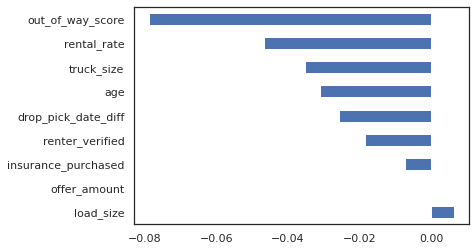

In [ ]:
weights = pd.Series(-importance.importances_mean, index=X_train.columns.values)
weights.sort_values(ascending = False).plot(kind = 'barh')

**Summary report to the DS team:**


> The commonly used Naive Bayes was chosen after comparison with other classification models to predict the correlation between provided features and the success of whether customer will accept the discount offer or not. The model performance evaluation scores are overall > 0.70 for the training data but behaves poorly for the test data, indicating a room to be improved. This might be due to that the sample size is too small (n < 1000) and highly imbalanced. Collecting more observations will definitely help improve model accuracy and prediction ability.
> Also, some other features to consider:
- Sex of the customer
- Frequent customer or not (indicating by the past rental records)
- Any other discount used by the customer
- Drive alone or not











**Summary to the management**
> Based on the current model, we determined that in order to have more customers accept our offer, some possible things we can try:
- Reduce the extra distance the customer need to drive (out_of_way_score)
- Reduce the rental rate
- Offer higher amount of discount
